In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
ip= pd.read_csv('/content/IPL_2025_Auction.csv')

In [6]:
ip.head(n=5)

,Sr. No.,Player Name,Base Price,Winning Bid,Capped/Uncapped,Team,Sold/Unsold
0,1,Noor Ahmad,20000000,100000000.0,Capped,CSK,Sold
1,2,Ravichandaran Ashwin,20000000,97500000.0,Capped,CSK,Sold
2,3,Devon Conway,20000000,62500000.0,Capped,CSK,Sold
3,4,Syed Khaleel Ahmed,20000000,48000000.0,Capped,CSK,Sold
4,5,Rachin Ravindra,15000000,40000000.0,Capped,CSK,Sold


1)Which team spent the most money in the auction?
2)Who are the top 10 most expensive players?
3)Indian vs Overseas players — spending comparison.

In [7]:
ip.shape

(577, 7)

In [8]:
ip.isnull().sum()

,0
Sr. No.,0
Player Name,0
Base Price,0
Winning Bid,395
Capped/Uncapped,0
Team,395
Sold/Unsold,0


In [9]:
ip[ip['Winning Bid'].isnull()].head()

,Sr. No.,Player Name,Base Price,Winning Bid,Capped/Uncapped,Team,Sold/Unsold
182,183,David Warner,20000000,NaN,Capped,NaN,Unsold
183,184,Jonny Bairstow,20000000,NaN,Capped,NaN,Unsold
184,185,Kane Williamson,20000000,NaN,Capped,NaN,Unsold
185,186,Daryl Mitchell,20000000,NaN,Capped,NaN,Unsold
186,187,Shardul Thakur,20000000,NaN,Capped,NaN,Unsold


In [10]:
ip=ip.dropna(subset=['Winning Bid','Team'])

In [11]:
ip.isnull().sum()

,0
Sr. No.,0
Player Name,0
Base Price,0
Winning Bid,0
Capped/Uncapped,0
Team,0
Sold/Unsold,0


In [12]:
#Which team spent the most money in the auction?#

team_spending = ip.groupby('Team')['Winning Bid'].sum().reset_index()
team_spending.to_csv('team_spending.csv', index=False)



In [13]:
#Top 10 Most Expensive Players.#

ip.sort_values(by='Winning Bid', ascending=False).head(10)

,Sr. No.,Player Name,Base Price,Winning Bid,Capped/Uncapped,Team,Sold/Unsold
74,75,Rishabh Pant,20000000,270000000.0,Capped,LSG,Sold
111,112,Shreyas Iyer,20000000,267500000.0,Capped,PBKS,Sold
59,60,Venkatesh Iyer,20000000,237500000.0,Capped,KKR,Sold
112,113,Yuzvendra Chahal,20000000,180000000.0,Capped,PBKS,Sold
113,114,Arshdeep Singh,20000000,180000000.0,Capped,PBKS,Sold
39,40,Jos Buttler,20000000,157500000.0,Capped,GT,Sold
20,21,KL Rahul,20000000,140000000.0,Capped,DC,Sold
134,135,Josh Hazlewood,20000000,125000000.0,Capped,RCB,Sold
93,94,Trent Boult,20000000,125000000.0,Capped,MI,Sold
153,154,Jofra Archer,20000000,125000000.0,Capped,RR,Sold


In [14]:
top10_players = ip.sort_values(by='Winning Bid', ascending=False).head(10)
top10_players.to_csv("top10_players.csv", index=False)


In [15]:
#Indian vs Overseas players — spending comparison.#
team_compare = ip.groupby('Capped/Uncapped')['Winning Bid'].mean().reset_index()
team_compare.to_csv('team_compare.csv', index=False)


PBKS spent the most in the auction with ₹110cr, while RR spent the least.

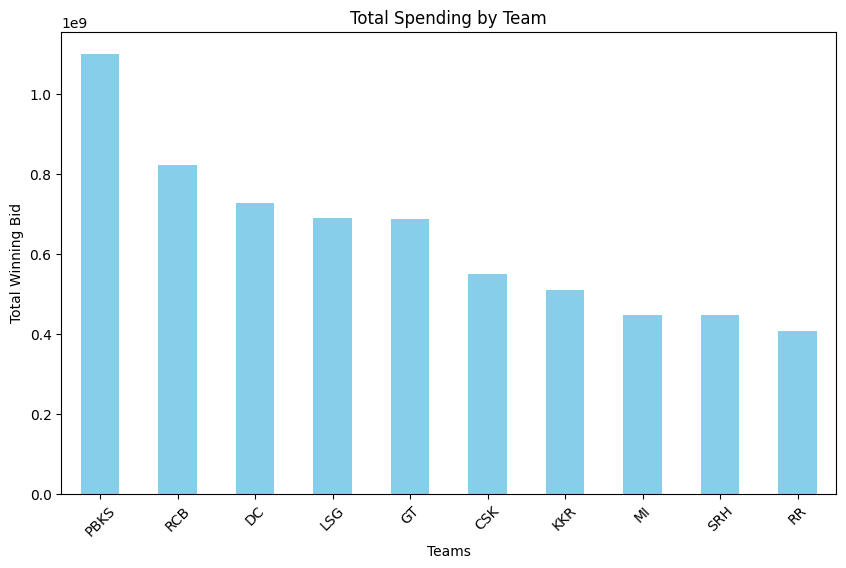

In [16]:
#This will give you a professional bar chart where the tallest bar = team that spent the most.


team_spending = ip.groupby("Team")["Winning Bid"].sum().sort_values(ascending=False)

team_spending.plot(kind="bar", figsize=(10,6), color="skyblue")
plt.title("Total Spending by Team")
plt.ylabel("Total Winning Bid")
plt.xlabel("Teams")
plt.xticks(rotation=45)
plt.show()


The most expensive player was RISHAB PANT with a bid of ₹27cr. Most top 10 players belong to 2–3 teams.

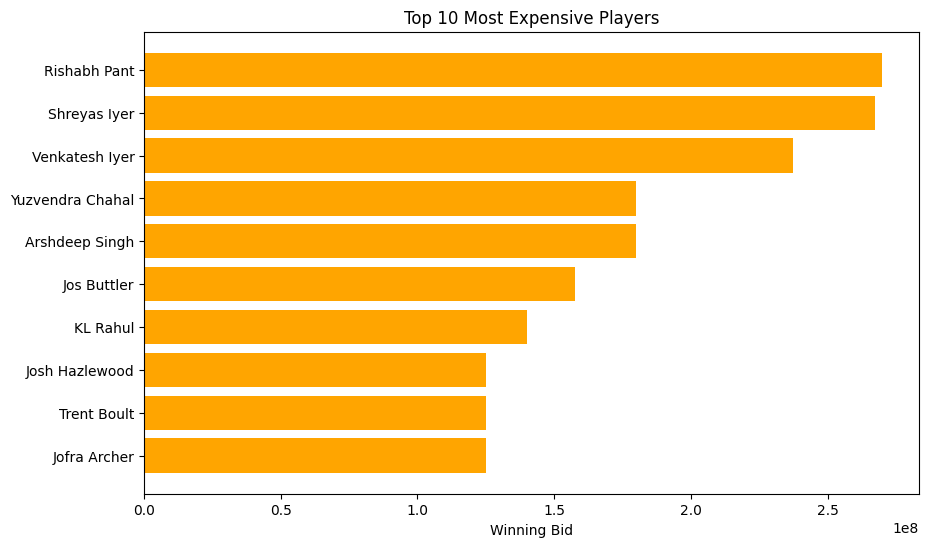

In [17]:
#This will give you a professional bar chart where the tallest bar = team that spent the most.

top10_players = ip.sort_values(by="Winning Bid", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10_players["Player Name"], top10_players["Winning Bid"], color="orange")
plt.title("Top 10 Most Expensive Players")
plt.xlabel("Winning Bid")
plt.gca().invert_yaxis()  # So the highest bid appears at the top
plt.show()


On average, capped players attracted higher bids than uncapped ones.

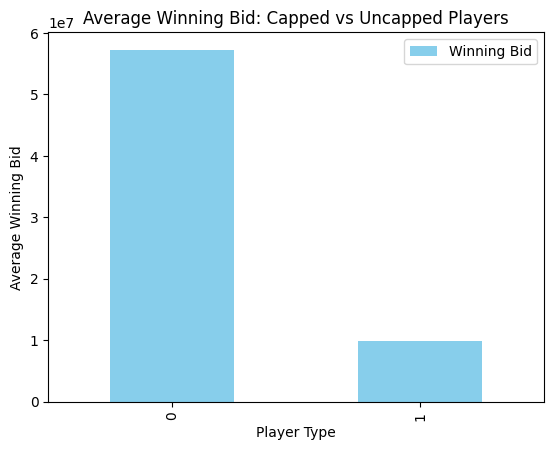

In [18]:
#Compare table


team_compare.plot(kind="bar", color=["skyblue", "orange"])
plt.title("Average Winning Bid: Capped vs Uncapped Players")
plt.ylabel("Average Winning Bid")
plt.xlabel("Player Type")
plt.show()